In [20]:
import numpy as np
import matplotlib.pyplot as plt

def assemble_stiffness_matrix(n, alpha, gamma, h):
    K = np.zeros((n+1, n+1))

    for i in range(n):
        K[i, i] += 2 * alpha / h + 2 * gamma * h / 3
        K[i, i+1] += -alpha / h + gamma * h / 6
        K[i+1, i] += -alpha / h + gamma * h / 6
        K[i+1, i+1] += alpha / h + gamma * h / 3

    return K

def assemble_load_vector(n, h):
    F = np.zeros(n+1)

    for i in range(n):
        F[i] += h / 2
        F[i+1] += h / 2

    return F

def solve_fem(n, alpha, gamma):
    h = 1.0 / n
    K = assemble_stiffness_matrix(n, alpha, gamma, h)
    F = assemble_load_vector(n, h)
    # Impor condições de contorno
    K[0, 0] = 1.0
    K[0, 1:] = 0.0
    K[1:, 0] = 0.0
    F[0] = 0.0

    U = np.linalg.solve(K, F)
    return U, h

def plot_solution(U, h):

    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.legend()
    plt.title('Solução Aproximada pelo Método de Elementos Finitos')
    plt.show()

def u_e(x, alpha):
    k = np.sqrt(alpha)
    numerator = -np.exp((1 - x) / k) - np.exp(x / k) + np.exp(1 / k) + 1
    denominator = np.exp(1 / k) + 1
    return numerator / denominator


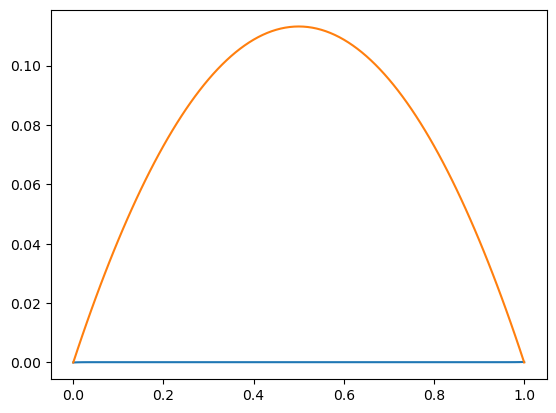

In [21]:
# Parâmetros do problema
n = 10
alpha = 1.0
gamma = 1.0

# Resolver o problema pelo método de elementos finitos
U, h = solve_fem(n, alpha, gamma)

x = np.linspace(0, 1, len(U))
plt.plot(x, U, label='Solução Numérica')
plt.plot(x, [u_e(xi, alpha) for xi in x])